##코드 참고 - https://jxnjxn.tistory.com/49

In [3]:
#!pip install glove_python_binary

In [22]:
#pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import pandas as pd
from glove import Corpus, Glove
import pickle

In [104]:
data = pd.read_csv('mbig_댓글_라벨_띄어쓰기.csv',index_col=0)
tokens = pd.DataFrame(data['comment'])
tokens

,comment
0,이 거 그거 같다 그 분노의 질주 더 익스트림에서 샤를리즈 테론 사이퍼 이 좀비 타...
1,아니 ㅋㅋ 브레이크 등 왜 안 들어오냐고 아 ㅋㅋ
2,볼보운전자보다 제가 운전 경력 삼십년 가까이 됩니다그동안 대우차 현대차 쉐보레 차 ...
3,주차부터 멋지게 하셨네요
4,운전 실력 굳 국기 게양대 파워 클라스 인정
...,...
5659,최명숙 딱 봐도 님이 잼민이 같아 요 능지가
5660,최명숙 아니 행동하고 생각하는 게 잼민이 같다는 거에 요 이해력이 부족하신 듯
5661,잼민이 아니죠 어륜이죠
5662,누가 문재인 얼굴에다 계란 좀 던져줬으면 좋겠다


In [105]:
from konlpy.tag import Okt
okt = Okt()
#okt.morphs(tokens['comment'][1])

In [107]:
train_token = []
for i in range(len(tokens)):
  train_token.append(okt.morphs(tokens['comment'][i]))
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063


3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715


5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365


In [108]:
train_token

[['이',
  '거',
  '그거',
  '같다',
  '그',
  '분노',
  '의',
  '질주',
  '더',
  '익스트림',
  '에서',
  '샤를',
  '리즈',
  '테론',
  '사이퍼',
  '이',
  '좀비',
  '타임',
  '하면서',
  '전부',
  '다',
  '폐차',
  '만들어',
  '놓은',
  '거'],
 ['아니', 'ㅋㅋ', '브레이크', '등', '왜', '안', '들어오냐고', '아', 'ㅋㅋ'],
 ['볼보',
  '운전자',
  '보다',
  '제',
  '가',
  '운전',
  '경력',
  '삼',
  '십년',
  '가까이',
  '됩니다',
  '그동안',
  '대우',
  '차',
  '현대차',
  '쉐보레',
  '차',
  '중형',
  '급',
  '신차',
  '만',
  '뽑아서',
  '운전',
  '해본',
  '결과',
  '외제차',
  '는',
  '무조건',
  '걸러',
  '야',
  '된다고',
  '봅니다',
  '사고',
  '시',
  '부품',
  '비',
  '인건비',
  '가',
  '타',
  '국산',
  '차',
  '에',
  '비해',
  '비쌉니다',
  '물론',
  '잘',
  '들',
  '아시겠지만',
  '국산',
  '차는',
  '해외',
  '수출',
  '용',
  '보다',
  '헉',
  '소리',
  '나오게',
  '국민',
  '들',
  '뒷북',
  '치',
  '게',
  '만드시는',
  '거',
  '알거에요',
  '그래도',
  '국내',
  '브랜드',
  '차량',
  '이',
  '써비스',
  '쎈',
  '타도',
  '많고',
  '부품',
  '준비',
  '돼',
  '있고',
  '외제차',
  '보다',
  '추천',
  '드립니',
  '다'],
 ['주차', '부터', '멋지게', '하셨네요'],
 ['운전', '실력', '굳', '국기', '게양', '대', '파워', '클라스', 

In [109]:
corpus = Corpus()
corpus.fit(train_token,window=20)

In [110]:
#model
glove = Glove(no_components=128, learning_rate=0.01)
%time glove.fit(corpus.matrix, epochs=50,no_threads=4,verbose=False)
glove.add_dictionary(corpus.dictionary)

#save
glove.save('glove_w20_epoch50.model')

Wall time: 17.5 s


In [111]:
#load glove model
glove_model = Glove.load('glove_w20_epoch50.model')

In [112]:
# word dict 생성
word_dict = {}
for word in  glove_model.dictionary.keys():
    word_dict[word] = glove_model.word_vectors[glove_model.dictionary[word]]
print('[Success !] Lengh of word dict... : ', len(word_dict))

# save word_dict
with open('glove_word_dict_128.pickle', 'wb') as f:
    pickle.dump(word_dict, f)
print('[Success !] Save word dict!...')

[Success !] Lengh of word dict... :  6129
[Success !] Save word dict!...


In [113]:
word_dict

{'이': array([ 0.25651668, -0.26026555, -0.28160382,  0.02502278,  0.10965764,
        -0.031931  ,  0.20927689,  0.28681645, -0.25220439,  0.24514057,
        -0.0644967 ,  0.27963248, -0.20534542,  0.11762496,  0.05483943,
        -0.36568977,  0.09791906,  0.2120793 , -0.20961712, -0.11326021,
         0.08315261,  0.22485953, -0.2797045 ,  0.22534648,  0.07177758,
         0.14725826,  0.28997233, -0.15166192, -0.28137273, -0.11142725,
        -0.28761196, -0.05650401,  0.17724297, -0.24563587,  0.24636777,
        -0.18065636,  0.02958442,  0.09717863,  0.18150119,  0.16976371,
        -0.21171474,  0.1716898 ,  0.21792521, -0.30411108, -0.26852709,
         0.02528128, -0.18068087,  0.09176819,  0.16031158,  0.21365563,
         0.01259419,  0.0753149 ,  0.00790662, -0.07408903,  0.26999191,
         0.04484444, -0.21151341,  0.18541566, -0.20110045,  0.22180249,
        -0.27664069, -0.19041712, -0.11740806, -0.27393437,  0.2508663 ,
        -0.1368098 ,  0.24417902,  0.30454522,

In [98]:
word_dict.keys()

dict_keys(['현재', '호텔', '주인', '심정', '아', '18', '난', '마른하늘', '에', '날벼락', '맞고', '망하게', '생겼는데', '누', '군', '계속', '추모', '받네', '못', '된', '넘', '들', '남', '의', '고통', '을', '즐겼던', '들이', '젠', '마땅한', '처벌', '받아야지', '그', '래야', '공정한', '사회', '지', '심은대로', '거두거라', '1', '사람', '얼굴', '손톱', '으로', '긁은것은', '인격', '살해', '이고', '2', '동영상', '이', '몰카', '냐', '메걸', '리안', '생각', '없노', '100년', '안에', '남녀', '간', '성', '전쟁', '한번', '크게', '치룬', '후', '일부다처제', '여성', '정치', '참여', '금지', '투표', '권', '삭제', '가', '세계', '공통', '문화', '로', '자리', '잡을듯', '암탉', '너무', '울어', '댐', '180', '이하', '호빗', '한남', '은', '결혼', '하지마', '셈', 'ㅋ', '돈', '없으면', '연애', '도', '니', '유전자', '받아서', '받을', '네', '후손', '뭔', '죄임', '키', '감량', '을해', '야', '박수', '쳐주지', '그냥', '먹고', '싶은거다', '먹고디', '비져', '자고', '하', '면', '로는', '쪄', '230', '대', '골빈', '여자', '기사', '다', '모이는', '건가', 'ㅋㅋㅋㅋ', '이래서', '는', '주면', '안된다', '엠넷', '사전투표', '나', '하고', '살아야지', '계집', '2006년', '포도', '밭', '사나이', '에서', '흰가운', '입은', '연구원', '정소영', '봐라', '솔', '까', '대한민국', '여배우', '중', '최고', '이쁘고', '단아', '했다', '급식', '충', '멋', 

In [67]:
'''
#새로운 테스트 데이터 임베딩 시
# word dict : train데이터의 임베딩 사전
total_word_dict = {}
cnt = 0

for word in test_token:
    if word in word_dict.keys():
        total_word_dict[word] = word_dict[word]
    else:
        word_dict[word] = np.zeros((128))
        cnt += 1  # 처음 본 단어 갯수 세기

print('no train word -> 0....', cnt)
print('token -> word embedding....!',len(unique_tokens))
'''

TypeError: unhashable type: 'list'

In [114]:
test_token = train_token

def sent2vec_glove(tokens, embedding_dim=128):
    #문장 token 리스트를 받아서 임베딩 시킨다
  
    size = len(tokens)
    matrix = np.zeros((size, embedding_dim))
    word_table = word_dict     # glove word_dict

    for i, token in enumerate(tokens):
        vector = np.array([
            word_table[t] for t in token
            if t in word_table
        ])

        if vector.size != 0:
            final_vector = np.mean(vector, axis=0)
            matrix[i] = final_vector

    return matrix


#문장 임베딩
sentence_glove = sent2vec_glove(test_token)
sentence_glove.shape

(5664, 128)

In [115]:
# sklearn
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
# clustering
k = 20
kmeans = KMeans(n_clusters=k, random_state=2021).fit(sentence_glove)
#y_pred = kmeans.fit_predict(sentence_glove)
y_pred = kmeans.labels_
y_pred

array([ 4,  5,  1, ...,  7, 13,  7])

In [117]:
len(y_pred)

5664

In [118]:
# tsne
tsne = TSNE(verbose=1, perplexity=100, random_state=2021)   # perplexity : 유사정도
X_embedded = tsne.fit_transform(sentence_glove)
print('Embedding shape 확인', X_embedded.shape)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 5664 samples in 0.401s...
[t-SNE] Computed neighbors for 5664 samples in 7.248s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5664
[t-SNE] Computed conditional probabilities for sample 2000 / 5664
[t-SNE] Computed conditional probabilities for sample 3000 / 5664
[t-SNE] Computed conditional probabilities for sample 4000 / 5664
[t-SNE] Computed conditional probabilities for sample 5000 / 5664
[t-SNE] Computed conditional probabilities for sample 5664 / 5664
[t-SNE] Mean sigma: 0.017143
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.996181
[t-SNE] KL divergence after 1000 iterations: 0.436898
Embedding shape 확인 (5664, 2)


In [119]:
len(X_embedded[:,0])

5664

C:\Users\JAIEUN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


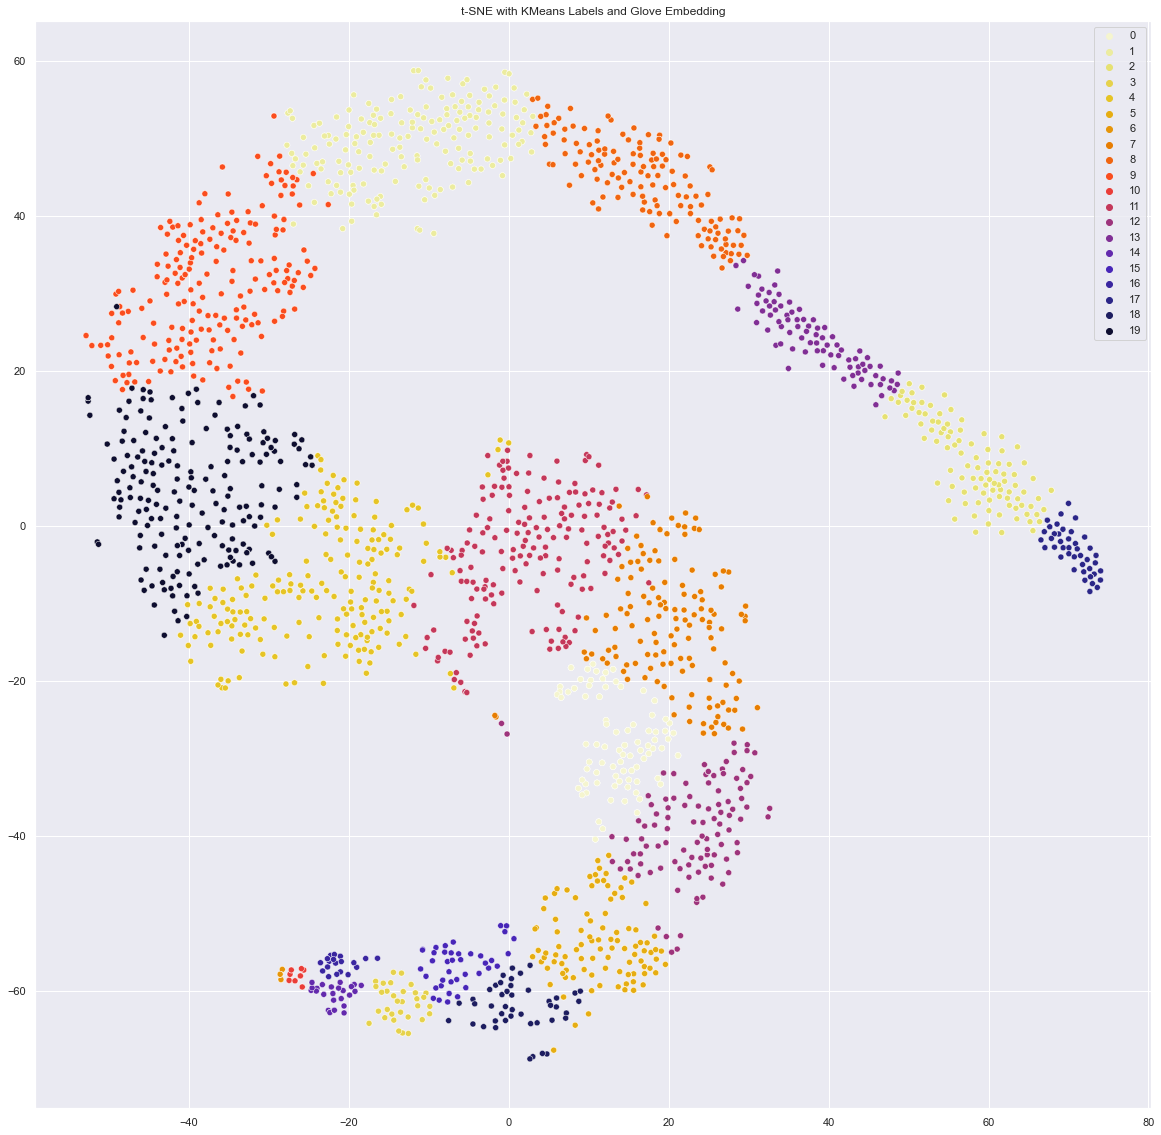

In [120]:
# 시각화
sns.set(rc={'figure.figsize':(20,20)})
# colors
#palette = sns.hls_palette(10, l=.4, s=.9) 
palette = sns.color_palette('CMRmap_r',20)
# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred,
                legend='full',palette=palette)     # kmeans로 예측

plt.title('t-SNE with KMeans Labels and Glove Embedding')
plt.savefig('tsne_glove_embedding_all.png')
plt.show()

In [122]:
data['cluster'] = y_pred
data

,comment,sentiment,cluster
0,이 거 그거 같다 그 분노의 질주 더 익스트림에서 샤를리즈 테론 사이퍼 이 좀비 타...,0.0,4
1,아니 ㅋㅋ 브레이크 등 왜 안 들어오냐고 아 ㅋㅋ,0.0,5
2,볼보운전자보다 제가 운전 경력 삼십년 가까이 됩니다그동안 대우차 현대차 쉐보레 차 ...,0.0,1
3,주차부터 멋지게 하셨네요,0.0,13
4,운전 실력 굳 국기 게양대 파워 클라스 인정,0.0,2
...,...,...,...
5659,최명숙 딱 봐도 님이 잼민이 같아 요 능지가,1.0,12
5660,최명숙 아니 행동하고 생각하는 게 잼민이 같다는 거에 요 이해력이 부족하신 듯,1.0,5
5661,잼민이 아니죠 어륜이죠,1.0,7
5662,누가 문재인 얼굴에다 계란 좀 던져줬으면 좋겠다,1.0,13


In [132]:
print(data['comment'][data['cluster']==1]) #531개
print()
print(data['comment'][data['cluster']==2])
print()
print(data['comment'][data['cluster']==3])
print()
print(data['comment'][data['cluster']==4])

2       볼보운전자보다 제가 운전 경력 삼십년 가까이 됩니다그동안 대우차 현대차 쉐보레 차 ...
6                                               저기 우리 동넨데
8       수동 타는 데 현기차 고 수입차고 쌍용차 고 급발진 사고가 일어 나네요 너무 무섭다...
14                              키 햐급발진 나면 고객 탓 국내나 국외나 ㅋㅋ
15                   전기차를 타면 4226226 이렇게 될 수 있는 거니까 어떻게 탐
                              ...                        
5631                           ㅈ 까세요 말로 해서 안 되는 일도 있는 법이여
5633                                             문쪼잔뱅이는 쩝
5638                                           거지 같은 유튜버들
5646                            저 때 닭년 목아지를 비틀어버렸어야 되는 건데
5656                              어그로 장인 틀 딱 아 한글 교실 좀 가라
Name: comment, Length: 531, dtype: object

4       운전 실력 굳 국기 게양대 파워 클라스 인정
13                         2억 겨우
26             엄청나게 와 소름 무섭네요 ㅜㅜ
40                         중국산 끝
69                          무섭네요
                  ...           
5586                        ㅁㅊㅅㄲ
5603                     역시 똥 싼고
5614                           ㅗ
5649                  

In [145]:
print(data['comment'][(data['sentiment']==0)&(data['cluster']==1)])
print()
print(data['comment'][(data['sentiment']==1)&(data['cluster']==1)])

2       볼보운전자보다 제가 운전 경력 삼십년 가까이 됩니다그동안 대우차 현대차 쉐보레 차 ...
6                                               저기 우리 동넨데
8       수동 타는 데 현기차 고 수입차고 쌍용차 고 급발진 사고가 일어 나네요 너무 무섭다...
14                              키 햐급발진 나면 고객 탓 국내나 국외나 ㅋㅋ
15                   전기차를 타면 4226226 이렇게 될 수 있는 거니까 어떻게 탐
                              ...                        
2498     아니 못 배워 먹은 티를 꼭 나이 먹어서도 내야겠어 진짜 너무 하네 지도자가 맞는지 참
2590                                             왜 이러는 걸까
2601                                말로 해서 안 되니 계란 던지지 않을까
2603                아무리 정치인이 싫어도 칼로 얼굴 긁는 건 아니다 명백한 살인미수다
2648                바로 고소당하고 국정 윈 지하실로 끌려가서 온갖 고문은 다 당할 듯
Name: comment, Length: 267, dtype: object

2654                        안 전 따지지 말고 결함을 따져라 똥대가리 색히 들아
2662                                       와 근데 운전 ㅈㄴ 잘하네
2670    아이고 현대 기 아가 그러니깐 보란 듯이 차주한테 떠넘기네 나라꼬라지가 븅신같이 돌...
2671                                  ㅋㅋㅋㅋㅋㅋ 2억배상은 뭐야 미친년
2675    왜 항상 급발진은 거의 고령자 여성 운전자일까 그게 너무 궁금하다 젊은 남성 운전자...
                             

Found distortion for 2 clusters
Found distortion for 3 clusters
Found distortion for 4 clusters
Found distortion for 5 clusters
Found distortion for 6 clusters
Found distortion for 7 clusters
Found distortion for 8 clusters
Found distortion for 9 clusters
Found distortion for 10 clusters
Found distortion for 11 clusters
Found distortion for 12 clusters
Found distortion for 13 clusters
Found distortion for 14 clusters
Found distortion for 15 clusters
Found distortion for 16 clusters
Found distortion for 17 clusters
Found distortion for 18 clusters
Found distortion for 19 clusters
Found distortion for 20 clusters
Found distortion for 21 clusters
Found distortion for 22 clusters
Found distortion for 23 clusters
Found distortion for 24 clusters
Found distortion for 25 clusters
Found distortion for 26 clusters
Found distortion for 27 clusters
Found distortion for 28 clusters
Found distortion for 29 clusters
Found distortion for 30 clusters
Found distortion for 31 clusters
Found distortion f

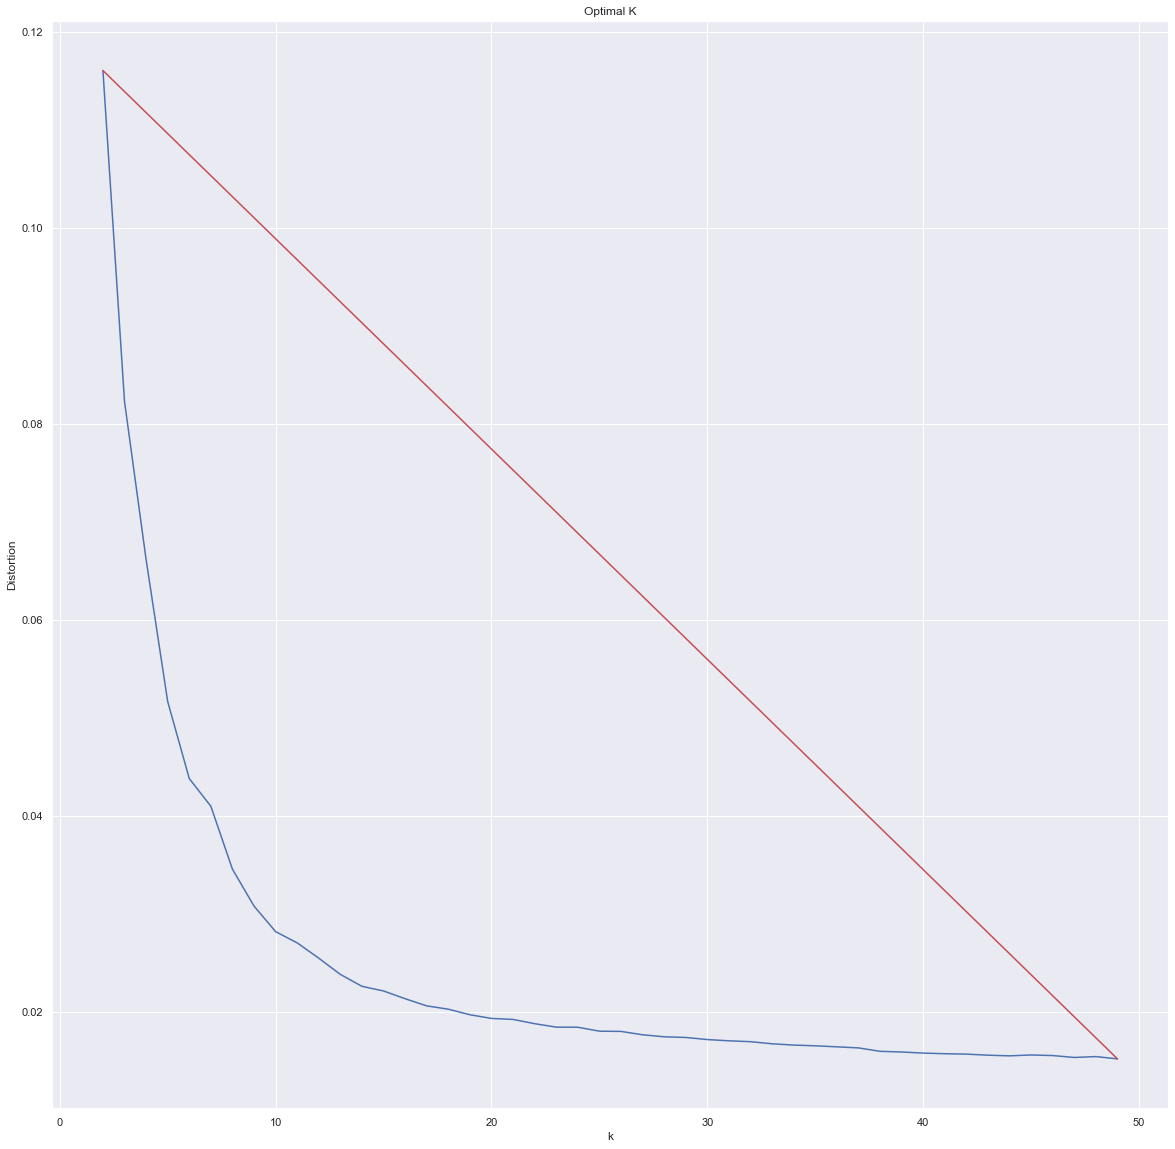

In [77]:

# 최적의 K 찾기 : 군집 갯수 k 찾기
from sklearn import metrics
from scipy.spatial.distance import cdist

# K=50 개의 클러스터에 대해서 시각화
distortions = []
K = range(2, 50)
#tqdm.pandas()

for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(sentence_glove)
    k_means.fit(sentence_glove)
    distortions.append(sum(np.min(cdist(sentence_glove, k_means.cluster_centers_, 'euclidean'), axis=1)) / sentence_glove.shape[0])
    
    print('Found distortion for {} clusters'.format(k))

# Visualization
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K')
plt.show()